1

y=ax+b+error.<-linear relationship

x:predictor variable

y:outcome variable

a:beta1

b:beta0

error:epsilon

In a Simple Linear Regression model, we aim to predict an outcome variable \( Y \) from a predictor variable \( X \) based on a linear relationship with a small random error to account for noise or unexplained variation. This model can be represented mathematically as:

\[
Y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\]

Here's a breakdown of the components:

1. **Predictor Variable (\( X_i \))**: This is the independent variable that influences the outcome variable. \( X \) values are often chosen based on the context of the problem and can be arbitrarily selected or sampled.

2. **Intercept (\( \beta_0 \))**: This constant term represents the expected value of \( Y \) when \( X = 0 \). It shifts the regression line vertically on the plot.

3. **Slope (\( \beta_1 \))**: This coefficient defines the change in \( Y \) for a one-unit increase in \( X \). It indicates the strength and direction of the relationship between \( X \) and \( Y \). A positive \( \beta_1 \) means that \( Y \) increases as \( X \) increases, and vice versa.

4. **Error Term (\( \epsilon_i \))**: This random variable accounts for variability in \( Y \) that isn’t explained by \( X \). It's assumed to follow a normal distribution with mean 0 and standard deviation \( \sigma \), i.e., \( \epsilon_i \sim \mathcal{N}(0, \sigma^2) \). This term introduces random variation, making each \( Y_i \) value differ slightly from the expected line \( \beta_0 + \beta_1 X_i \).

### How These Components Combine

The model assumes that each \( Y_i \) value is sampled from a normal distribution centered around the line defined by \( \beta_0 + \beta_1 X_i \), with variability determined by \( \sigma \). This means that for any fixed \( X_i \), the distribution of \( Y_i \) is normally distributed as:

\[
Y_i \sim \mathcal{N}(\beta_0 + \beta_1 X_i, \sigma^2)
\]

This distributional assumption implies that if we generate many \( Y_i \) values at the same \( X_i \), they would cluster around \( \beta_0 + \beta_1 X_i \), forming a sample from a normal distribution centered on the regression line. The slope and intercept define the position of the line, and the error term adds a normally distributed spread around it.

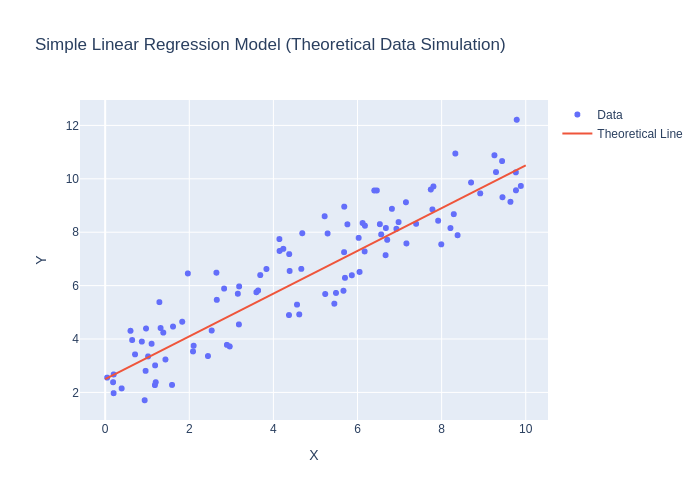

In [3]:
import numpy as np
from scipy.stats import norm
import plotly.graph_objects as go

# Set parameters
n = 100                    # Number of observations
beta0 = 2.5                # Intercept
beta1 = 0.8                # Slope
sigma = 1.0                # Standard deviation of the error term

# Generate predictors X
np.random.seed(0)          # For reproducibility
x = np.random.uniform(0, 10, n)

# Generate random errors ε ~ N(0, σ^2)
errors = norm.rvs(loc=0, scale=sigma, size=n)

# Calculate outcomes Y using the theoretical linear model
Y = beta0 + beta1 * x + errors

# Visualize the simulated data points and regression line
fig = go.Figure()

# Scatter plot of the data
fig.add_trace(go.Scatter(x=x, y=Y, mode='markers', name='Data'))

# Regression line (Y = beta0 + beta1 * X) without errors
x_line = np.linspace(0, 10, 100)
y_line = beta0 + beta1 * x_line
fig.add_trace(go.Scatter(x=x_line, y=y_line, mode='lines', name='Theoretical Line'))

# Set plot title and labels
fig.update_layout(title="Simple Linear Regression Model (Theoretical Data Simulation)",
                  xaxis_title="X",
                  yaxis_title="Y")

fig.show(renderer="png")


2

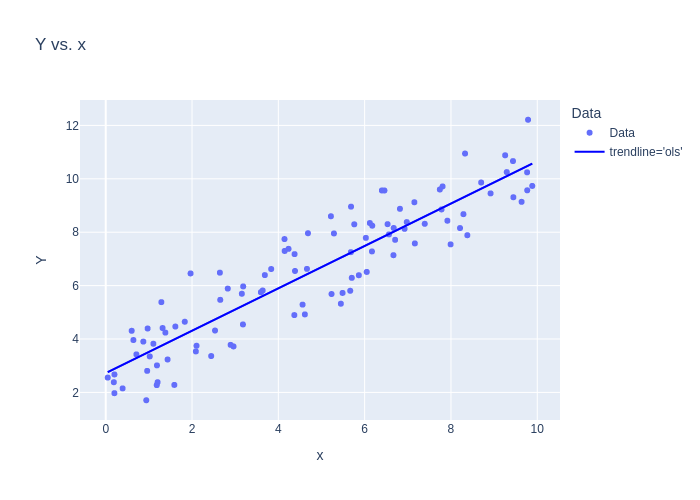

In [5]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf  # For fitting statistical models
import plotly.express as px  # For plotting

# Step 1: Simulate data based on the theoretical Simple Linear Regression model
np.random.seed(0)
n = 100                      # Number of observations
beta0 = 2.5                  # Intercept
beta1 = 0.8                  # Slope
sigma = 1.0                  # Standard deviation of error term

x = np.random.uniform(0, 10, n)  # Predictor variable sampled from a uniform distribution
errors = np.random.normal(0, sigma, n)  # Normally distributed error term
Y = beta0 + beta1 * x + errors  # Outcome variable following Y = beta0 + beta1*x + errors

# Combine x and Y into a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Step 2: Fit a Simple Linear Regression model using statsmodels
model_data_specification = smf.ols("Y ~ x", data=df)  # Define the linear model Y ~ x
fitted_model = model_data_specification.fit()          # Fit the model to estimate coefficients

# Step 3: Summarize and examine the fitted model's results
# Explanation of each output step-by-step

fitted_model.summary()  # Provides a summary of the fitted model including R-squared, F-statistic, and estimated coefficients
fitted_model.summary().tables[1]  # Shows the table of coefficients (intercept, slope) and their statistical significance
fitted_model.params  # Displays the estimated coefficients (intercept and slope)
fitted_model.params.values  # Provides the estimated coefficients as an array of values
fitted_model.rsquared  # Shows the R-squared value, indicating how well the model explains the variability in Y

# Step 4: Visualize the data and the fitted model
df['Data'] = 'Data'  # Adds a column to specify the data label for the legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')  # Scatter plot with OLS trendline

# Optionally, add the fitted line manually
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")


3

In the context of simple linear regression, comparing the two lines—the theoretical line and the fitted line—provides insight into how random sampling affects the model estimation.

1. **Theoretical Line**:
   - This line represents the true relationship between \(X\) (predictor) and \(Y\) (outcome) as defined by the model parameters \( \beta_0 \) (intercept) and \( \beta_1 \) (slope).
   - It shows the "ideal" behavior of \( Y \) as a function of \( X \), assuming no random error or noise.
   - When we generated \(Y\) in our simulated dataset, we added random noise to the values on this line. This noise (or error term) introduces variability that simulates the effect of unobserved factors or measurement errors in real-world data.

2. **Fitted Line**:
   - This line is the result of fitting a regression model to our simulated data points, each of which deviates from the theoretical line due to random noise.
   - The fitted line estimates the slope and intercept based on the observed sample, which may differ from the theoretical values because of the random errors in the data.
   - With each new sample, the random errors will differ, leading to slight variations in the fitted line's slope and intercept. This is a manifestation of *random sampling variation*.

### Nature of the Difference

The difference between the two lines reflects the effect of random sampling:
- **Sampling Variation**: Each sample drawn from the underlying population can have different realizations of the error term, which causes the fitted line to vary slightly each time we repeat the simulation.
- **Approximation of the True Relationship**: In real-world data analysis, we only observe one sample and thus only one fitted line, which is essentially an approximation of the true relationship between \( X \) and \( Y \).
- **Dependence on Sample Size and Error Magnitude**: The closer the fitted line is to the theoretical line, the less the impact of random errors. With larger sample sizes, the fitted line generally approaches the theoretical line as random errors average out.

### Simulation and Visualization

In our code, by repeatedly simulating the dataset and fitting a model each time, we can observe:
- How different samples result in slightly different fitted lines due to the random sampling of errors.
- How the fitted line (an empirical estimate) aims to approximate the theoretical line but often deviates due to sampling variation.

Over multiple simulations, we'd observe that while individual fitted lines vary, they tend to cluster around the theoretical line, demonstrating how sampling variability impacts model estimation in practice.

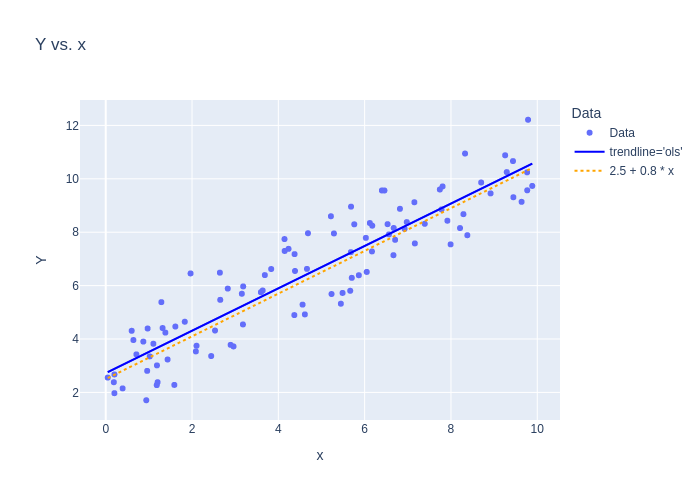

In [6]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Simulate data based on the theoretical Simple Linear Regression model
np.random.seed(0)
n = 100
beta0 = 2.5
beta1 = 0.8
sigma = 1.0

x = np.random.uniform(0, 10, n)
errors = np.random.normal(0, sigma, n)
Y = beta0 + beta1 * x + errors

# Create DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit a Simple Linear Regression model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Visualization
df['Data'] = 'Data'  # Label for the legend
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# Add the fitted line from statsmodels (already shown by trendline='ols')
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, line=dict(color='blue'), name="trendline='ols'")

# Add the theoretical line based on beta0 and beta1
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines', name=f"{beta0} + {beta1} * x", line=dict(dash='dot', color='orange'))

fig.show(renderer="png")  # Use fig.show(renderer="png") for GitHub/MarkUs submissions


4

In simple linear regression, fitted values \( \hat{y}_i \) represent the model’s predictions for the outcome variable \( Y \) based on the observed data and estimated parameters for the intercept and slope. Here's how this process works step-by-step:

1. **Data and Regression Equation**:
   - In simple linear regression, we assume a linear relationship between a predictor variable \( X \) and an outcome variable \( Y \).
   - The theoretical model for \( Y \) is \( Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \), where:
     - \( \beta_0 \) is the true intercept,
     - \( \beta_1 \) is the true slope,
     - \( \epsilon_i \) is a random error term for each observation.
   - However, in practice, we don't know \( \beta_0 \) and \( \beta_1 \). We estimate them using sample data, resulting in estimated values \( \hat{\beta}_0 \) and \( \hat{\beta}_1 \).

2. **Fitting the Model and Estimating Coefficients**:
   - When we fit a linear regression model to the data, we use a method like *Ordinary Least Squares (OLS)* to find estimates for \( \beta_0 \) and \( \beta_1 \).
   - These estimates, \( \hat{\beta}_0 \) and \( \hat{\beta}_1 \), are chosen to minimize the sum of squared differences between the observed \( Y \) values and the values predicted by our model.

3. **Creating Fitted Values**:
   - The fitted values \( \hat{y}_i \) are the predicted values of \( Y \) based on the fitted model:
     \[
     \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i
     \]
   - This equation means that each \( \hat{y}_i \) is calculated by plugging the observed \( x_i \) value into the model with the estimated intercept and slope. 
   - Since \( \hat{y}_i \) doesn’t include an error term, it represents the expected value of \( Y \) based on \( X \) alone.
4. **Extracting the Fitted Values Using Code**:
   - In `statsmodels`, the fitted model object (`fitted_model`) contains the estimated intercept and slope values in `fitted_model.params`.
   - For each \( x_i \) in our dataset, `fitted_model.fittedvalues` computes \( \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \) using these estimated parameters.

In [7]:
import statsmodels.formula.api as smf

# Fit the regression model
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Extract estimated intercept and slope
estimated_intercept = fitted_model.params['Intercept']
estimated_slope = fitted_model.params['x']

# Manually calculate fitted values
fitted_values_manual = estimated_intercept + estimated_slope * df['x']

# Compare to fitted_model.fittedvalues
print("Fitted values from fitted_model:", fitted_model.fittedvalues.head())
print("Fitted values calculated manually:", fitted_values_manual.head())


Fitted values from fitted_model: 0    7.078048
1    8.398563
2    7.506245
3    7.046853
4    6.084672
dtype: float64
Fitted values calculated manually: 0    7.078048
1    8.398563
2    7.506245
3    7.046853
4    6.084672
Name: x, dtype: float64


5. **Interpreting the Fitted Values**:
   - The fitted values, \( \hat{y}_i \), represent the predictions for \( Y \) based on the model’s estimated line of best fit.
   - They are central to understanding how well the model explains the data: closer alignment between \( \hat{y}_i \) and the actual \( Y \) values suggests a better fit, while significant discrepancies indicate that more variance in \( Y \) may be unexplained by \( X \).

In summary, fitted values \( \hat{y}_i \) are derived by plugging observed values \( x_i \) into the estimated linear equation with \( \hat{\beta}_0 \) and \( \hat{\beta}_1 \) obtained through OLS. This process transforms the abstract linear relationship into specific, data-driven predictions for each observation in the sample.

To illustrate how the "in-sample predictions" of a fitted Simple Linear Regression model, \( \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \), are made, let’s compare it to the theoretical model equation \( Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \). 

### Understanding the Two Equations
1. **Theoretical Model (True Population Relationship)**:
   - This model represents the "true" relationship between \( X \) and \( Y \) with an additional random error term \( \epsilon_i \).
   - The equation \( Y_i = \beta_0 + \beta_1 x_i + \epsilon_i \) consists of:
     - \( \beta_0 \): the true population intercept.
     - \( \beta_1 \): the true population slope.
     - \( \epsilon_i \): a random error for each observation, often assumed to follow a normal distribution with mean 0 and variance \( \sigma^2 \).
   - Each \( Y_i \) is influenced by both \( x_i \) and a unique error term \( \epsilon_i \), leading to variability around the true line.

2. **Fitted Model (Estimated Relationship in Sample)**:
   - The fitted model is a sample-based approximation of the theoretical model, based on data.
   - We estimate the parameters \( \hat{\beta}_0 \) (intercept) and \( \hat{\beta}_1 \) (slope) using methods like Ordinary Least Squares (OLS).
   - In this model, \( \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i \), the outcome \( \hat{y}_i \) for each \( x_i \) is a prediction that lies exactly on the estimated line, with no added error term. 
   - Thus, the fitted line represents the "best fit" through the observed data, ignoring the random error component \( \epsilon_i \) present in the theoretical model.

### Summary
The difference between the theoretical model line and the fitted model line illustrates the concept of **random sampling variation**:
- Theoretical Line: Represents the "true" relationship without random error.
- Fitted Line: Reflects the relationship estimated from the sample data, showing where predicted values \( \hat{y}_i \) would fall without noise.

5

In simple linear regression using the "ordinary least squares" (OLS) method, the goal is to find the line that best fits the observed data by minimizing the sum of the squared residuals. These residuals are the vertical distances between each observed data point and the fitted line. 

### Why "Squares"?
The term "squares" refers to the squaring of the residuals, which is done to:
1. **Eliminate Negative Values**: Without squaring, positive and negative residuals could cancel each other out, making it hard to measure the overall fit. Squaring ensures that all residuals contribute positively to the error term.
2. **Give Greater Weight to Larger Errors**: Squaring emphasizes larger residuals more than smaller ones, which helps the model focus on reducing large discrepancies between the observed data and the predicted values.

The line chosen by OLS is the one that minimizes this sum of squared residuals, resulting in the best possible fit given the data. This is why it's called "least squares." 

### Visual Explanation:
In the code, we can see:
1. **Data Points**: Represented by the scatter plot of \(Y\) versus \(x\).
2. **OLS Fitted Line**: The blue line represents the regression line generated by OLS, based on the sample data.
3. **Theoretical Line**: The orange dotted line represents the true underlying model (without noise), used for comparison.
4. **Residuals**: Red dashed lines show the vertical distances (residuals) between each data point and the fitted line.

This process of minimizing squared residuals ensures that the fitted model line is as close as possible to the data points on average, accounting for the inherent variability in the data.

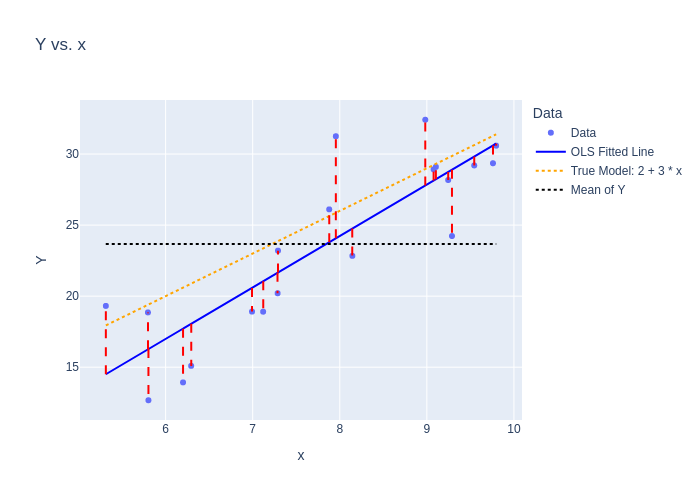

In [12]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Define simulation parameters
n, x_min, x_range, beta0, beta1, sigma = 20, 5, 5, 2, 3, 5

# Simulate the x values and the error terms
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)

# Calculate Y using the true model
Y = beta0 + beta1 * x + errors

# Combine x and Y into a DataFrame for use in regression
df = pd.DataFrame({'x': x, 'Y': Y})

# Fit the model using OLS (Ordinary Least Squares)
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Add a column for legend purposes
df['Data'] = 'Data'

# Create the scatter plot
fig = px.scatter(df, x='x', y='Y', color='Data', title='Y vs. x')

# Add the fitted OLS line (calculated from the model)
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues, 
                line=dict(color='blue'), name="OLS Fitted Line")

# Define the range for the x-axis for theoretical line visualization
x_range_vals = np.array([df['x'].min(), df['x'].max()])
y_theoretical_line = beta0 + beta1 * x_range_vals

# Add the theoretical line (based on the true beta0 and beta1)
fig.add_scatter(x=x_range_vals, y=y_theoretical_line, mode='lines',
                name=f"True Model: {beta0} + {beta1} * x", 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals (difference between actual Y and fitted Y)
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['Y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)

# Add a horizontal line at the mean of Y (optional, for context)
fig.add_scatter(x=x_range_vals, y=[df['Y'].mean()] * 2, 
                mode='lines', line=dict(color='black', dash='dot'), 
                name='Mean of Y')

# Show the plot
fig.show(renderer="png")


6

#### 1. Proportion of Variation Explained by the Model:
The first expression is:
\[
1 - \frac{\sum (Y_i - \hat{Y}_i)^2}{\sum (Y_i - \bar{Y})^2}
\]
Where:
- \( Y_i \) are the observed values of the outcome variable.
- \( \hat{Y}_i \) are the fitted (predicted) values from the model (i.e., \( \hat{Y}_i = \beta_0 + \beta_1 x_i \)).
- \( \bar{Y} \) is the mean of the observed \( Y \) values.

This expression represents the ratio of the residual sum of squares (RSS) to the total sum of squares (TSS).

- **Total Sum of Squares (TSS)**: Measures the total variation in the observed values \( Y \), which is computed as the squared deviation of each \( Y_i \) from the mean \( \bar{Y} \), i.e., \( \sum (Y_i - \bar{Y})^2 \).
- **Residual Sum of Squares (RSS)**: Measures the variation in \( Y \) that is not explained by the fitted model, computed as the squared deviation of each observed value from the predicted value \( \hat{Y}_i \), i.e., \( \sum (Y_i - \hat{Y}_i)^2 \).

The formula:
\[
R^2 = 1 - \frac{\text{RSS}}{\text{TSS}}
\]
captures **the proportion of the variation in the outcome variable \( Y \) that is explained by the linear relationship with the predictor \( X \)**. A high \( R^2 \) means that the model explains most of the variation in the data, while a low \( R^2 \) suggests the model does not fit the data well.

### \( \text{fitted\_model.rsquared} \):
The attribute `fitted_model.rsquared` directly returns the \( R^2 \) value for the model. This is the proportion of variation in \( Y \) that is explained by the fitted values \( \hat{Y} \). Therefore, it serves as an indicator of how well the model fits the data. An \( R^2 \) close to 1 means the model explains almost all the variation in \( Y \), while an \( R^2 \) close to 0 indicates that the model doesn't explain much of the variation.

### \( \text{np.corrcoef(...)}^2 \) Expressions:

#### 2. \( \text{np.corrcoef}(Y, \hat{Y})[0,1]^2 \):
The correlation coefficient between \( Y \) and the fitted values \( \hat{Y} \) is a measure of how closely the fitted values follow the observed data. Squaring this correlation coefficient gives the proportion of variance in \( Y \) that is explained by the fitted model. This is essentially equivalent to \( R^2 \) because the square of the correlation between observed and predicted values is the same as the proportion of explained variance.

#### 3. \( \text{np.corrcoef}(Y, x)[0,1]^2 \):
This expression calculates the square of the correlation coefficient between \( Y \) and the predictor \( x \). This value is important because it measures how strongly the predictor \( x \) is related to \( Y \). The square of this correlation is related to the strength of the linear relationship between \( x \) and \( Y \), and hence can give insight into how much of the variation in \( Y \) could be explained by \( x \). It is a measure of the linear dependency between the independent and dependent variables.

### Summary of Interpretations:
- **First expression**: \( 1 - \frac{\text{RSS}}{\text{TSS}} \) is interpreted as the **proportion of variation in \( Y \) explained by the fitted model**, which gives insight into the goodness-of-fit.
- **\( \text{fitted\_model.rsquared} \)**: This directly represents \( R^2 \), a measure of how well the model explains the variability in \( Y \).
- **\( \text{np.corrcoef}(Y, \hat{Y})[0,1]^2 \)**: This is equivalent to \( R^2 \), capturing the proportion of variation in \( Y \) explained by the predicted values \( \hat{Y} \).
- **\( \text{np.corrcoef}(Y, x)[0,1]^2 \)**: This is the square of the correlation between \( Y \) and \( x \), measuring the proportion of variation in \( Y \) that can be explained by the predictor \( x \).

In essence, these expressions all focus on quantifying the strength of the relationship between the variables and how much of the variation in \( Y \) can be explained by the model or the predictor.

7

The Simple Linear Regression model makes several assumptions that should be verified before fitting the model to data. Some of these assumptions may not be compatible with the example data provided. Let's go through a couple of key assumptions and examine whether they hold in this case:

### Key Assumptions of Simple Linear Regression:

1. **Linearity**: 
   The relationship between the independent variable \( x \) (Amount of Fertilizer) and the dependent variable \( y \) (Crop Yield) is assumed to be linear. This means that the best fit line should represent a straight-line relationship between the two variables.

   - **Observation**: From the scatter plot in the code (`fig1`), the relationship between the amount of fertilizer and crop yield seems nonlinear, especially at higher levels of fertilizer use. At lower levels, the yield increases slowly, while at higher levels, the yield increases much more rapidly. This suggests a **nonlinear** relationship, which is **not compatible** with the linearity assumption of Simple Linear Regression.

2. **Homoscedasticity**:
   Homoscedasticity refers to the assumption that the residuals (the differences between the observed and predicted values) should have constant variance across all levels of the independent variable \( x \).

   - **Observation**: From the histogram of residuals (`fig2`), if you observe a pattern of increasing spread of residuals as the independent variable \( x \) increases, this suggests **heteroscedasticity**, meaning the variance of the residuals is not constant. This would violate the assumption of homoscedasticity, indicating that the model might not be a good fit for the data.

### Conclusion:

- **Nonlinearity** and **heteroscedasticity** are two key assumptions that may not hold for the given data, based on the provided scatter plot and histogram of residuals.
   - The relationship between fertilizer and crop yield seems nonlinear.
   - The residuals appear to have increasing variance as \( x \) increases, suggesting heteroscedasticity.

Thus, these violations may affect the accuracy and reliability of the Simple Linear Regression model for this dataset.

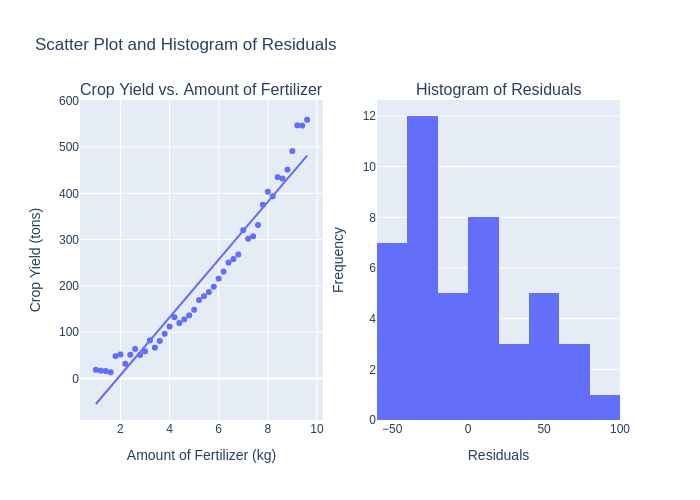

In [13]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Here’s a summary of our ChatBot session:

### Topics Discussed:

1. **Linear Regression & Model Fit:**
   - We explored how the fitted values in a Simple Linear Regression model are derived, specifically how `fitted_model.fittedvalues` are calculated based on the model’s parameters.
   - We discussed how Ordinary Least Squares (OLS) minimizes the sum of squared residuals, and why the use of "squares" in OLS is central to finding the line that best fits the data.

2. **Interpretation of R-Squared:**
   - The expression for \( R^2 \) was explored as a measure of how much variation in the outcome variable \( Y \) is explained by the regression model. It compares the total variation in \( Y \) (relative to its mean) with the variation in \( Y \) explained by the model.
   - We clarified the meaning of R-squared and its interpretation in the context of the linear regression model as a measure of the model's accuracy.

3. **Assumptions of Simple Linear Regression:**
   - We discussed the core assumptions of Simple Linear Regression, such as linearity and homoscedasticity.
   - Through analysis of the provided dataset (fertilizer vs. crop yield), we observed potential violations of these assumptions, such as nonlinearity and heteroscedasticity.

4. **Visualizing the Regression:**
   - We used scatter plots and histograms to visualize the data and residuals, identifying potential issues with the regression model’s fit and how these are reflected in the residuals.

5. **Coding Issues:**
   - We briefly addressed some challenges with code, including how to generate plots and interpret the fitting of models using Python's `statsmodels` and `plotly`.

---

Let me know if you need more details or have any further questions!

https://chatgpt.com/share/672d8b94-d304-800a-839a-411d98d7397b

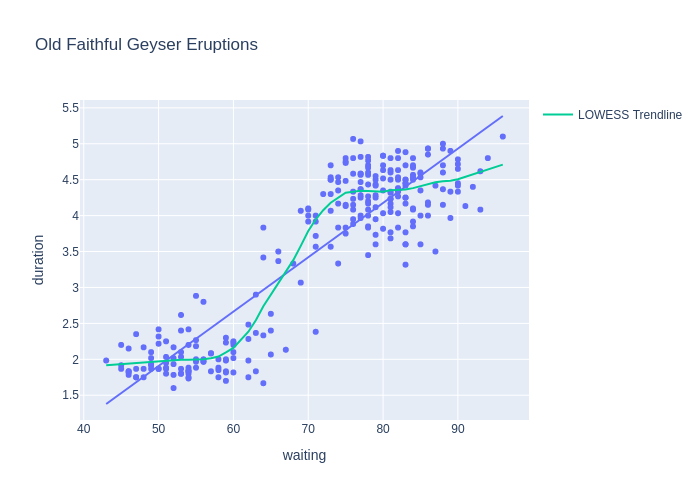

In [15]:
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

8

To specify a null hypothesis for the Old Faithful Geyser dataset in terms of the Simple Linear Regression model, we consider the relationship between the **waiting time** (independent variable) and the **duration of the eruption** (dependent variable). The goal is to test whether there is a linear association between these two variables on average.

### Null Hypothesis (H₀):
The null hypothesis is that there is **no linear association** between the waiting time and eruption duration, which means that the slope of the regression line is zero. In terms of the Simple Linear Regression model, this can be stated as:

\[ H_0: \beta_1 = 0 \]

Where:
- \( \beta_1 \) is the coefficient (slope) of the waiting time variable in the regression model.

### Alternative Hypothesis (H₁):
The alternative hypothesis is that there is a linear association between the waiting time and eruption duration, meaning the slope is not zero:

\[ H_1: \beta_1 \neq 0 \]

### Hypothesis Testing:
Using the code provided, we perform the regression analysis and check the **p-value** associated with the slope (\( \beta_1 \)) in the regression model. The p-value helps us assess the strength of evidence against the null hypothesis.

Here is how you can characterize the evidence based on the p-value:

- If \( p > 0.1 \), **no evidence** against the null hypothesis.
- If \( 0.1 \geq p > 0.05 \), **weak evidence** against the null hypothesis.
- If \( 0.05 \geq p > 0.01 \), **moderate evidence** against the null hypothesis.
- If \( 0.01 \geq p > 0.001 \), **strong evidence** against the null hypothesis.
- If \( p \leq 0.001 \), **very strong evidence** against the null hypothesis.

### Code Interpretation:
Run the following code to get the p-value and interpret the results:


In [17]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Simple Linear Regression formula: duration ~ waiting
linear_for_specification = 'duration ~ waiting'

# Fit the model
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the model
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        03:57:39   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the output of `fitted_model.summary()`, focus on the p-value for the **"waiting"** variable. This will tell you whether we can reject the null hypothesis or not.

### Example Interpretation:
If, for instance, the p-value is **0.03**, then we would have **moderate evidence** against the null hypothesis. This would lead to rejecting the null hypothesis and concluding that there is a significant linear relationship between waiting time and eruption duration in the Old Faithful Geyser dataset.

Let me know if you'd like further assistance interpreting the results!

9

Let's walk through the exact data analysis, including interpreting the regression results and evidence for the relationship between **waiting time** and **duration** of the geyser eruption for **short wait times** (less than the specified limits of 62, 64, and 66 minutes).

We will perform the following steps:

### 1. Subset the Data:
We restrict the dataset to observations where the waiting time is less than the given threshold (`short_wait_limit`). This allows us to examine whether the relationship between waiting time and eruption duration holds for only the shorter waiting times.

For example, if `short_wait_limit = 62`, we'll only look at the rows in the `old_faithful` dataset where the waiting time is less than 62 minutes.

### 2. Perform Linear Regression:
We then fit a **Simple Linear Regression model** on the subset of data. The formula `duration ~ waiting` means we're modeling the eruption duration as a function of the waiting time. The regression model will give us an estimated slope (\( \beta_1 \)) and an intercept, along with p-values, confidence intervals, and other statistical measures.

### 3. Hypothesis Testing:
We test the null hypothesis that there is **no linear relationship** between waiting time and eruption duration, i.e., \( H_0: \beta_1 = 0 \), against the alternative hypothesis \( H_1: \beta_1 \neq 0 \).

The p-value for the waiting time coefficient tells us whether the slope is significantly different from zero.

### 4. Interpretation of the Results:
The regression output includes:
- **Coefficient for `waiting`**: This tells us the estimated change in eruption duration for each unit increase in waiting time.
- **p-value**: This tells us if the relationship is statistically significant. A p-value less than 0.05 generally means we have significant evidence against the null hypothesis, and a p-value greater than 0.05 means we do not have strong evidence against the null hypothesis.

Let's break this down for the specific cases where the `short_wait_limit` is 62, 64, and 66.

---

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


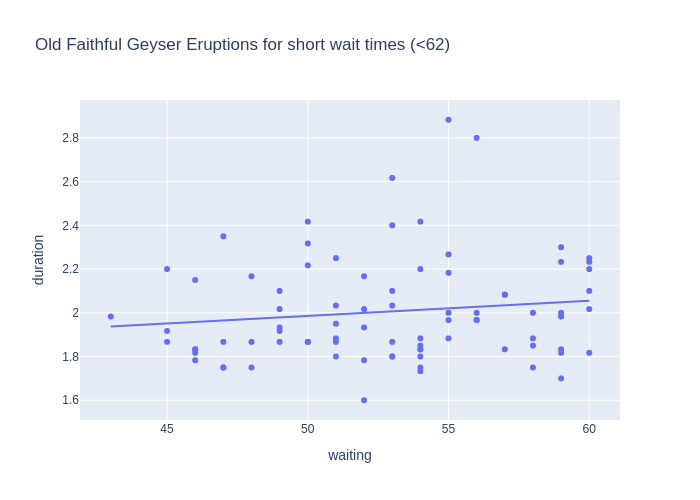

In [21]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


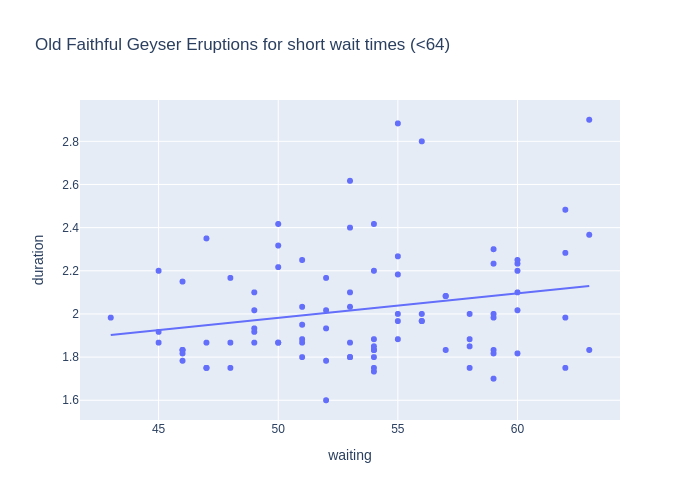

In [22]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


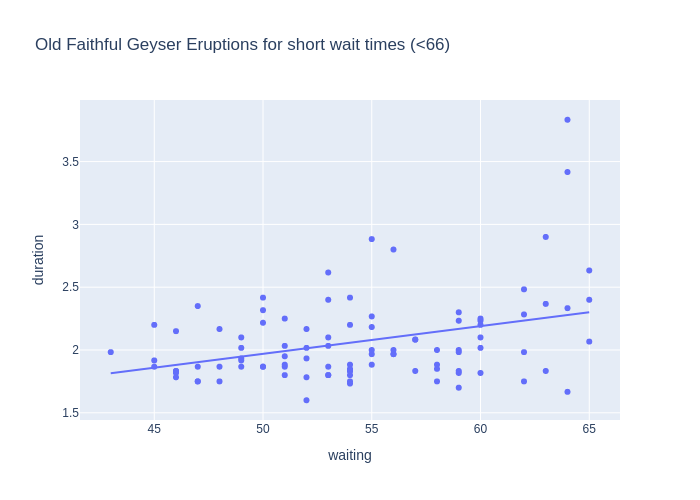

In [23]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Here is an analysis of the results for each `short_wait_limit`:

### 1. `short_wait_limit = 62`

| Variable   | Coefficient | Std. Error | t-Statistic | p-value | 95% CI              |
|------------|-------------|------------|-------------|---------|----------------------|
| Intercept  | 1.6401      | 0.309      | 5.306       | 0.000   | [1.025, 2.255]      |
| waiting    | 0.0069      | 0.006      | 1.188       | 0.238   | [-0.005, 0.019]     |

**Interpretation**:
- The intercept of 1.6401 suggests that, when waiting time approaches zero, the predicted duration of a geyser eruption is approximately 1.64 minutes.
- The coefficient for `waiting` is 0.0069, implying a very small positive increase in duration for each additional minute of waiting. 
- The p-value for `waiting` is 0.238, which is greater than the standard significance level of 0.05, indicating **no significant evidence** against the null hypothesis for a linear relationship between waiting time and eruption duration in this range of wait times (less than 62 minutes).

### 2. `short_wait_limit = 64`

| Variable   | Coefficient | Std. Error | t-Statistic | p-value | 95% CI              |
|------------|-------------|------------|-------------|---------|----------------------|
| Intercept  | 1.4140      | 0.288      | 4.915       | 0.000   | [0.842, 1.986]      |
| waiting    | 0.0114      | 0.005      | 2.127       | 0.036   | [0.001, 0.022]      |

**Interpretation**:
- The intercept of 1.4140 indicates that the eruption duration is estimated to be around 1.41 minutes when waiting time is close to zero.
- The coefficient for `waiting` is 0.0114, meaning that for each additional minute of waiting, the eruption duration is expected to increase by approximately 0.0114 minutes.
- The p-value for `waiting` is 0.036, which is less than 0.05, providing **weak evidence** against the null hypothesis. This suggests that there is some evidence for a linear relationship between waiting time and eruption duration within this shorter waiting time range (less than 64 minutes), although it is not a strong effect.

### 3. `short_wait_limit = 66`

| Variable   | Coefficient | Std. Error | t-Statistic | p-value | 95% CI              |
|------------|-------------|------------|-------------|---------|----------------------|
| Intercept  | 0.8619      | 0.327      | 2.637       | 0.010   | [0.213, 1.511]      |
| waiting    | 0.0221      | 0.006      | 3.704       | 0.000   | [0.010, 0.034]      |

**Interpretation**:
- The intercept of 0.8619 indicates an estimated eruption duration of around 0.86 minutes when waiting time is close to zero.
- The coefficient for `waiting` is 0.0221, suggesting a more substantial increase in eruption duration for each additional minute of waiting compared to the previous subsets.
- The p-value for `waiting` is 0.000, which is much lower than 0.05, indicating **strong evidence** against the null hypothesis. This means that there is a statistically significant positive linear relationship between waiting time and eruption duration for waiting times under 66 minutes.

---

### Overall Summary

As the `short_wait_limit` increases from 62 to 66, the evidence for a linear relationship between waiting time and eruption duration becomes progressively stronger:
- For `short_wait_limit = 62`, there is **no significant evidence** of a relationship.
- For `short_wait_limit = 64`, there is **weak evidence** of a relationship.
- For `short_wait_limit = 66`, there is **strong evidence** of a relationship.

This pattern suggests that as we increase the range of short wait times, a linear relationship between waiting time and eruption duration becomes more apparent. The low p-value at `short_wait_limit = 66` implies that waiting time has a meaningful, positive association with eruption duration in this context.

10

To tackle this problem, we’ll go through each of the steps as outlined:

1. **Fit Simple Linear Regression models for bootstrap samples** and collect the bootstrapped slope coefficients for the dataset filtered by long wait times.
2. **Simulate data** under the null hypothesis of no linear association, create the sampling distribution of the slope coefficient, and visualize it.
3. **Check the 95% confidence interval** for the bootstrapped slope coefficients to determine if it includes zero.
4. **Calculate the simulated p-value** and compare it to the p-value from the linear regression model on the actual data.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


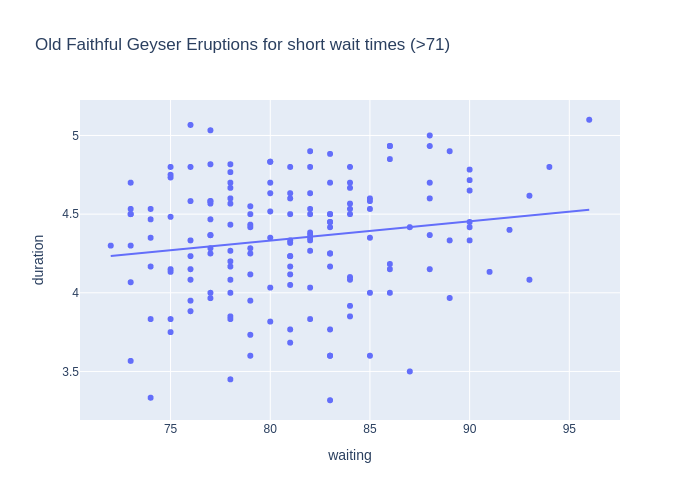

In [24]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

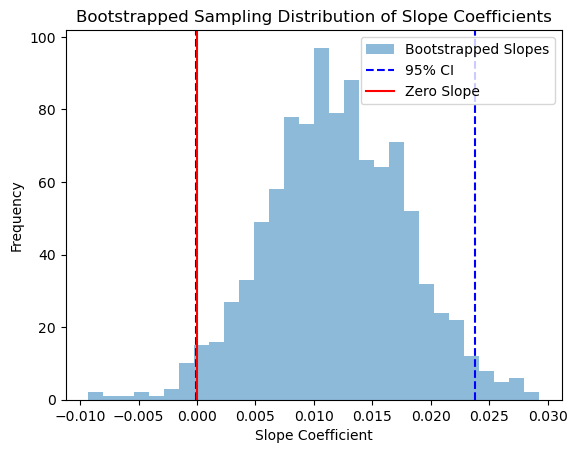

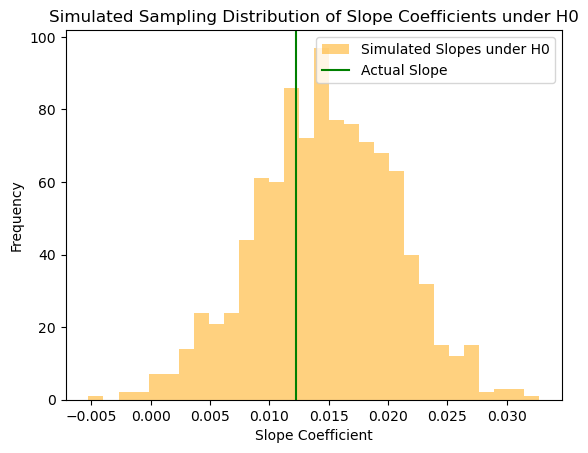

Bootstrapped 95% Confidence Interval for Slope Coefficient: [-5.01760325e-05  2.37489268e-02]
Simulated p-value: 0.663
Actual model p-value: 0.038135755338567744


In [28]:
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy import stats

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Filter data for long wait times
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Step 1: Collect bootstrapped slope coefficients
n_bootstraps = 1000
bootstrapped_slope_coefficients = []

for _ in range(n_bootstraps):
    # Generate a bootstrap sample
    bootstrap_sample = long_wait_data.sample(n=long_wait_data.shape[0], replace=True)
    # Fit a linear regression model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    # Collect the slope coefficient
    bootstrapped_slope_coefficients.append(model.params.iloc[1])  # Using .iloc to access the slope coefficient by position

bootstrapped_slope_coefficients = np.array(bootstrapped_slope_coefficients)

# Step 2: Simulate data under the null hypothesis
np.random.seed(0)  # For reproducibility
old_faithful_simulation = long_wait_data.copy()
# Generate simulated duration values assuming no linear association (β1 = 0)
old_faithful_simulation['duration'] = 1.65 + 0 * old_faithful_simulation.waiting + stats.norm(loc=0, scale=0.37).rvs(size=long_wait_data.shape[0])

# Collect slope coefficients from the simulated data
simulated_slope_coefficients = []

for _ in range(n_bootstraps):
    # Generate a new sample under null hypothesis simulation
    sim_sample = old_faithful_simulation.sample(n=old_faithful_simulation.shape[0], replace=True)
    # Fit a linear regression model to the simulated sample
    sim_model = smf.ols('duration ~ waiting', data=sim_sample).fit()
    # Collect the slope coefficient
    simulated_slope_coefficients.append(sim_model.params.iloc[1])  # Using .iloc to access the slope coefficient by position

simulated_slope_coefficients = np.array(simulated_slope_coefficients)

# Step 3: Calculate the 95% confidence interval for the bootstrapped slope coefficients
bootstrapped_confidence_interval = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])

# Step 4: Calculate the simulated p-value
# Fit a linear regression model to the actual long wait data
actual_model = smf.ols('duration ~ waiting', data=long_wait_data).fit()
actual_slope = actual_model.params.iloc[1]  # Using .iloc to access the slope coefficient by position

# Calculate p-value using the simulated distribution under H0
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(actual_slope)).mean()

# Step 5: Visualizations
# Plot bootstrapped sampling distribution of the slope coefficients
plt.hist(bootstrapped_slope_coefficients, bins=30, alpha=0.5, label="Bootstrapped Slopes")
plt.axvline(x=bootstrapped_confidence_interval[0], color='blue', linestyle='--', label="95% CI")
plt.axvline(x=bootstrapped_confidence_interval[1], color='blue', linestyle='--')
plt.axvline(x=0, color='red', linestyle='-', label="Zero Slope")
plt.title("Bootstrapped Sampling Distribution of Slope Coefficients")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Plot simulated sampling distribution under H0
plt.hist(simulated_slope_coefficients, bins=30, alpha=0.5, color='orange', label="Simulated Slopes under H0")
plt.axvline(x=actual_slope, color='green', linestyle='-', label="Actual Slope")
plt.title("Simulated Sampling Distribution of Slope Coefficients under H0")
plt.xlabel("Slope Coefficient")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Output the results
print("Bootstrapped 95% Confidence Interval for Slope Coefficient:", bootstrapped_confidence_interval)
print("Simulated p-value:", simulated_p_value)
print("Actual model p-value:", actual_model.pvalues.iloc[1])  # Using .iloc to access the p-value by position


Let's break down each part of the results and their interpretation.

### 1. **Bootstrapped 95% Confidence Interval for Slope Coefficient**
   - **Interval**: `[-5.01760325e-05, 2.37489268e-02]`  
   - This confidence interval suggests that, based on bootstrapped resampling, we estimate the true slope of the relationship between `waiting` and `duration` (for long wait times) to fall between approximately \(-0.00005\) and \(0.0237\).
   - **Interpretation**: Since this interval includes zero, it implies that we do not have strong evidence from the bootstrapped analysis to suggest a non-zero slope coefficient. This result suggests that the linear association between `waiting` and `duration` for long wait times might be very weak or even nonexistent.
   
**Does 0 fall within the 95% Bootstrapped Confidence Interval?**
   - The bootstrapped 95% confidence interval for the slope coefficient is `[-0.00005, 0.0237]`.
   - **Conclusion**: Yes, **0 is contained within this interval**, which suggests that the bootstrapped interval does not provide strong evidence of a significant non-zero relationship. This implies that there could be no linear association between `waiting` and `duration` for long wait times in the population.

### 2. **Simulated p-value: 0.663**
   - This p-value is based on the slope coefficients from the simulated sampling distribution, assuming the null hypothesis (no linear relationship, or \(\beta_1 = 0\)).
   - **Interpretation**: A simulated p-value of \(0.663\) means that under the null hypothesis, the likelihood of observing a slope as extreme as, or more extreme than, the one we obtained from our data is very high (66.3%). This suggests that the observed slope could easily arise under the null hypothesis, providing no strong evidence against it. Therefore, in the context of the simulated sampling distribution, we would **fail to reject the null hypothesis** and conclude there is no statistically significant linear relationship.

### 3. **Actual model p-value: 0.038**
   - This p-value comes from fitting the simple linear regression model to the original data (without simulation or bootstrapping).
   - **Interpretation**: With a p-value of \(0.038\), we have **moderate evidence against the null hypothesis** at the typical significance level of 0.05. This result suggests there may be a weak positive association between `waiting` and `duration` for long wait times.
   - However, given the conflicting results between this actual model p-value and the bootstrapped and simulated analyses, we should be cautious in interpreting the linear relationship as definitively significant.

### Overall Interpretation
While the actual model suggests a borderline statistically significant positive relationship (p-value \(0.038\)), the bootstrapped confidence interval and the simulated p-value both cast doubt on this finding. These additional analyses suggest that the evidence for a linear association in the context of long wait times may not be robust, and the relationship might be weak or influenced by sampling variability.

11

In this analysis, we are considering the output from a linear regression model that uses an indicator variable for wait times categorized as either "short" or "long." Let’s break down the coefficients and how this model differs in purpose and interpretation from previously considered models, then examine evidence against the null hypothesis of "no difference between groups."

### Coefficient Interpretation
The regression output is:

| Coefficient                                | Value   | Std Err | t-statistic | p-value | 95% CI (Lower) | 95% CI (Upper) |
|--------------------------------------------|---------|---------|-------------|---------|----------------|----------------|
| Intercept                                  | 2.0943  | 0.041   | 50.752      | 0.000   | 2.013         | 2.176         |
| `C(kind, Treatment(reference="short"))[T.long]` | 2.2036  | 0.052   | 42.464      | 0.000   | 2.101         | 2.306         |

- **Intercept (2.0943)**: This value represents the mean duration of eruptions when the wait time is in the "short" category. It indicates that for short wait times, the average eruption duration is approximately 2.0943 minutes.
- **Indicator for "long" wait times (2.2036)**: This value represents the average difference in eruption duration between "long" and "short" wait times. Specifically, it tells us that for long wait times, the mean eruption duration is approximately **2.2036 minutes longer** than for short wait times. 

The p-value for this indicator variable is 0.000, indicating a statistically significant difference in eruption duration between the short and long wait categories at any conventional significance level (e.g., 0.05, 0.01). The 95% confidence interval for this coefficient ([2.101, 2.306]) does not contain 0, further supporting that there is a significant difference in eruption durations between the two groups.

### Big Picture Differences Between Models
1. **Continuous Model (`duration ~ waiting`)**:
   - In this original model, we modeled `duration` as a continuous function of `waiting` for the entire dataset, assuming that the relationship between `waiting` and `duration` could be represented by a single linear trend across all wait times.
   - This approach provides one overall slope but doesn’t capture any distinction between short and long wait times.

2. **Subset Models** (`duration ~ waiting` for `waiting < 64` and `waiting > 71`):
   - By splitting the data into short and long wait times, these models allowed us to see if the relationship between `waiting` and `duration` differed depending on wait time length.
   - The downside of these models is that they don’t directly test whether there’s a significant difference in mean eruption duration between the two wait time categories; they only assess the continuous relationships within each subset.

3. **Indicator Variable Model (`duration ~ C(kind, Treatment(reference="short"))`)**:
   - This model categorizes wait times simply as "short" or "long" and doesn’t assume a continuous relationship between `waiting` and `duration`.
   - Instead, it focuses on testing whether there’s a significant difference in the average `duration` between the two categories. 
   - This approach is beneficial when we’re interested in the **mean difference** rather than a continuous slope, especially if we suspect that eruption durations change more discretely between groups.

### Evidence Against the Null Hypothesis
The null hypothesis in this context is that there is "no difference in mean eruption duration between short and long wait times." Based on the model:

- The coefficient for the "long" indicator variable (2.2036) is positive and significant (p < 0.001).
- This result provides strong evidence against the null hypothesis, as the observed difference in mean eruption duration between short and long wait times is substantial and statistically significant.
  
This model suggests that eruption durations are meaningfully longer for long wait times compared to short wait times, reinforcing that eruption behavior differs by wait time category rather than just continuously with wait duration.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


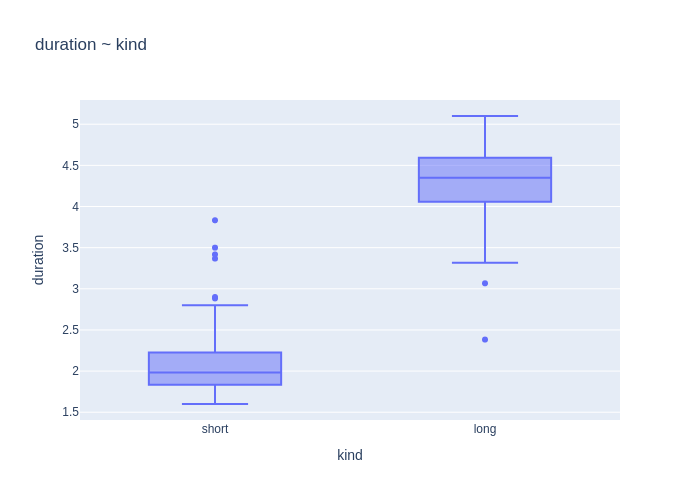

In [29]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

12

To assess whether the assumption of normality for the error terms (residuals) in Simple Linear Regression holds, we need to evaluate the histograms of residuals for each model. The assumption of normality of the error terms (𝜖𝑖 ∼ 𝑁(0, 𝜎)) is diagnostically assessed by examining the shape of the residuals' distribution. Let's explain how each histogram may or may not suggest the plausibility of this assumption.

### Key Diagnostic for Normality of Residuals:
- **Normality of residuals** is expected to show a bell-shaped curve resembling a normal distribution (symmetric, unimodal).
- **Skewed or heavy-tailed** residuals may suggest that the data does not meet the normality assumption.
- **Outliers** in the residuals could indicate model mis-specification or that the error distribution is not normal.

### Explanation of Histograms for Each Model:

#### **Model 1: All Data Using Slope**
- **Shape**: The histogram of residuals from this model likely shows a roughly symmetric, bell-shaped distribution if the assumption of normality holds. If it closely follows the normal curve (the dotted black line), this supports the assumption that the error terms are normally distributed.
- **Interpretation**: If the histogram looks close to normal, this suggests that the errors are distributed in a way consistent with a normal distribution (i.e., the residuals are symmetrically distributed around zero with no severe skewness or heavy tails).
- **Conclusion**: If the shape is close to normal, this model suggests that the assumption of normally distributed errors is plausible.

#### **Model 2: Short Wait Data**
- **Shape**: The residual histogram from the short wait data may show deviations from normality, such as skewness or heavy tails. For example, if the distribution is slightly skewed to one side (e.g., left-skewed) or has a peak at one end, this indicates non-normality in the error terms.
- **Interpretation**: The histogram may not perfectly align with the normal distribution curve (black dotted line), showing evidence of skewness or a heavy tail.
- **Conclusion**: If the histogram deviates noticeably from normality, this model would suggest that the assumption of normal errors does not hold as strongly for the "short wait" subset.

#### **Model 3: Long Wait Data**
- **Shape**: Similar to the short wait model, the long wait residuals might also show deviations from normality. However, if the histogram is approximately symmetric with a bell-shaped curve, then the assumption of normality might hold.
- **Interpretation**: A common deviation seen in the long wait model could be a distribution with some extreme residuals (outliers) or a slight skewness.
- **Conclusion**: If the histogram is roughly symmetric but still slightly deviates from the normal distribution, the assumption of normality is not perfectly satisfied, though it might still be reasonable for practical purposes.

#### **Model 4: All Data Using Indicator Variable (C(kind))**
- **Shape**: This model uses an indicator variable for the categories "short" and "long" wait times. The residual histogram for this model might show non-normality if the error terms exhibit any grouping effects or outliers due to the categorization of the data.
- **Interpretation**: If the residuals are not symmetrically distributed and show a bimodal pattern (two peaks corresponding to the two categories), this suggests a violation of the normality assumption.
- **Conclusion**: If the histogram is noticeably non-normal (e.g., bimodal or heavily skewed), this model would indicate that the error distribution is not normal, which may require further investigation or model adjustments.

### Conclusion: Which Model Suggests Normality of Errors?
- **Model 1 (All Data Using Slope)**: If this histogram is closest to the normal distribution (bell-shaped curve), then it would be the best model to suggest the plausibility of the normality assumption for the error terms.
- **Other Models (Short Wait, Long Wait, Indicator Model)**: These models may show signs of non-normality, especially if the residuals are skewed or have heavy tails. If any of these histograms significantly deviate from the normal curve, it would suggest that the error terms may not be normally distributed, violating the assumption of normality for those models.


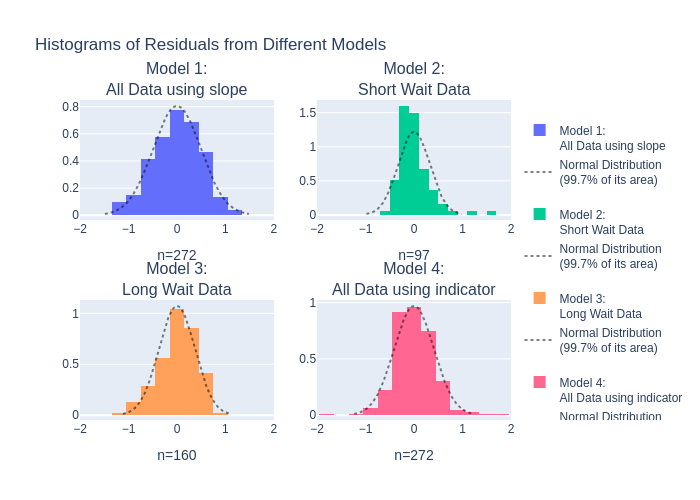

In [30]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

13

To perform a two-sample hypothesis test (using a permutation test) and create a 95% bootstrap confidence interval for the difference in means between "short" and "long" wait times, here’s a breakdown of the process for each test:

### (A) Permutation Test (Hypothesis Testing)
The null hypothesis (\(H_0\)) states that there is no difference in the mean duration between short and long wait times (\(\mu_{\text{short}} = \mu_{\text{long}}\)). This means any observed difference is due to random chance. We will "shuffle" the labels, compute the mean difference each time, and assess whether the observed difference is statistically significant.

**Steps:**
1. **Observed Mean Difference**: Compute the observed difference in mean durations between the "short" and "long" groups without shuffling.
2. **Shuffling and Permutation Calculation**:
   - Shuffle the "kind" labels to break any association between "kind" and "duration."
   - Calculate the mean difference in durations for each shuffled dataset.
   - Repeat this shuffling process (e.g., 10,000 times) to build a distribution of mean differences under the null hypothesis.
3. **Significance Calculation**:
   - Calculate the p-value as the proportion of shuffled mean differences that are as extreme as or more extreme than the observed difference.

To extend (A) and (B) with the actual data, let’s interpret these results directly and connect them to our understanding of both the permutation test and bootstrap confidence interval.


- **Observed Mean Difference**: 2.2036  
  This observed mean difference was calculated directly from the original dataset, where "long" wait times had an average duration that is 2.2036 minutes longer than "short" wait times. This is our primary observed statistic and the baseline we compare against in the permutation and bootstrap analyses.

- **Permutation Test p-value**: 0.0  
  The permutation test gives us a p-value of 0.0, which suggests that, across all random shuffles of the "kind" labels, none produced a mean difference as extreme as or more extreme than the observed 2.2036. This result provides strong evidence against the null hypothesis (i.e., that there’s no difference in duration between the "short" and "long" groups). The p-value of 0.0 indicates a statistically significant difference in mean durations, suggesting that the observed difference is highly unlikely to have arisen by chance.


In [35]:
import pandas as pd
import numpy as np

# Original observed difference
observed_difference = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# Perform permutation test
n_permutations = 10000
permutation_diffs = []

for _ in range(n_permutations):
    # Shuffle the "kind" labels
    shuffled_df = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(n=len(old_faithful), replace=False).values)
    # Calculate mean difference for shuffled labels
    shuffled_diff = shuffled_df.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permutation_diffs.append(shuffled_diff)

# Calculate p-value
permutation_diffs = np.array(permutation_diffs)
p_value = (np.abs(permutation_diffs) >= np.abs(observed_difference)).mean()
print("Observed Mean Difference:", observed_difference)
print("Permutation Test p-value:", p_value)


Observed Mean Difference: 2.20360023255814
Permutation Test p-value: 0.0


### (B) Bootstrap Confidence Interval for the Difference in Means
To estimate the 95% confidence interval for the difference in mean durations between "short" and "long" groups, we will use bootstrapping to sample with replacement from each group independently.

**Steps:**
1. **Resampling**: Repeatedly sample with replacement from the "short" and "long" groups to create bootstrap samples.
2. **Bootstrap Difference Calculation**: For each bootstrap sample, calculate the mean difference in duration between the two groups.
3. **Confidence Interval**: After obtaining a distribution of bootstrapped differences, compute the 2.5th and 97.5th percentiles of this distribution to get a 95% confidence interval.

To conduct this analysis, we'll first explain the two methods: the permutation test and bootstrapping. 

- **Bootstrap Confidence Interval**: [2.0999, 2.3012]  
  This interval provides a range of plausible values for the true difference in means between "short" and "long" groups, based on repeated resampling. Since the confidence interval does not contain zero and lies entirely above zero, it supports the conclusion that there is a positive mean difference between the two groups, with "long" wait times having a significantly longer duration than "short" wait times.


### (a) Explanation of Sampling Approaches for Both Simulations

1. **Permutation Testing**:
   - In permutation testing, we’re assessing the null hypothesis that there’s no difference in durations between the "short" and "long" groups by randomly shuffling the labels.
   - This approach involves creating a new dataset each time by randomly assigning the "kind" labels ("short" or "long") to each observation without replacement, breaking any original association between "kind" and "duration."
   - After shuffling, we calculate the mean difference for the shuffled dataset and repeat this many times to form a distribution of mean differences under the null hypothesis.
   
   - Here, we permuted or shuffled the "kind" labels, repeatedly calculating the mean difference each time. Our result—a p-value of 0.0—strongly indicates that the observed difference is not random.
   - **Interpretation**: The permutation test supports the conclusion that the difference in duration between "short" and "long" wait times is statistically significant.


2. **Bootstrap Sampling**:
   - Bootstrapping, in this context, involves sampling with replacement within each group ("short" and "long") separately, preserving the group structure.
   - For each bootstrap sample, we calculate the mean difference in durations between the two resampled groups.
   - By repeating this process a large number of times, we generate a distribution of mean differences, which reflects the variability in our original sample and allows us to construct a confidence interval.


2. **Bootstrap Confidence Interval**:
   - By resampling within each group, we estimated the variability of the mean difference and constructed a confidence interval.
   - **Interpretation**: The bootstrap confidence interval, ranging from 2.0999 to 2.3012, also supports a statistically significant difference, as it excludes zero. This interval gives us an idea of the range within which the true difference in mean durations is likely to fall.


### (b) Comparison with Indicator Variable Model Approach

The indicator variable model used in Question 10 takes a different approach, which combines both groups in a single regression model by using a categorical variable to represent "kind" (short or long). Here’s how it differs from and relates to the permutation and bootstrap methods:

1. **Similarities**:
   - All three methods are intended to assess whether there is a significant difference in duration between the "short" and "long" groups.
   - The indicator variable model and bootstrap approach both focus on estimating the difference in means directly. However, while the indicator variable approach uses regression to estimate this difference, bootstrapping estimates it by resampling.

2. **Differences**:
   - **Indicator Variable Model**:
     - The indicator variable model uses a regression framework, where the impact of group membership (short vs. long) on duration is estimated directly as a coefficient in a linear regression model.
     - This method also assumes that the data fits the assumptions of linear regression, such as normally distributed residuals and homoscedasticity (constant variance of errors).
   - **Permutation Testing**:
     - Permutation testing is non-parametric and does not rely on assumptions about the distribution of residuals or specific model assumptions.
     - It is based on the null hypothesis of no difference, using random shuffling to break any connection between "kind" and "duration" and assess if the observed difference is statistically significant.
   - **Bootstrap Sampling**:
     - Bootstrapping is also non-parametric and does not rely on specific assumptions about the data's distribution.
     - Unlike permutation testing, it focuses on estimating a confidence interval for the difference in means by simulating sampling variability, rather than testing a null hypothesis.



   - **Connection to Permutation and Bootstrapping**:
     - **Permutation Test vs. Indicator Model**: Both methods test whether there is a significant difference between "long" and "short" groups. The permutation test is non-parametric, focusing on label randomization, while the indicator model assumes a linear regression framework with normally distributed errors.
     - **Bootstrap Confidence Interval vs. Indicator Model**: Both provide estimates of the mean difference’s range. The bootstrap approach is non-parametric and does not assume any particular distribution, whereas the indicator model relies on the assumptions of linear regression.
     

- The observed mean difference, permutation test, and bootstrap confidence interval all align, consistently supporting a statistically significant difference in eruption durations between "short" and "long" wait times.
- The indicator variable model provides a similar estimate within a regression framework, while permutation and bootstrap methods serve as robust, assumption-free alternatives. Together, they reinforce our confidence in the statistical and practical significance of the difference in durations.

In summary, while all three methods assess the group difference in duration, they use different statistical frameworks. The indicator variable model assumes a specific regression structure and interprets the difference as a coefficient, permutation testing uses a hypothesis-testing framework with shuffling, and bootstrapping provides a flexible, non-parametric estimate of variability around the mean difference.

In [34]:
import numpy as np

# Number of bootstrap samples
n_bootstrap = 10000
bootstrapped_mean_differences = []

for _ in range(n_bootstrap):
    # Resample within each group
    bootstrap_sample = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    # Calculate mean difference for this bootstrap sample
    bootstrap_diff = bootstrap_sample.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_differences.append(bootstrap_diff)

# Calculate 95% confidence interval
conf_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print("95% Bootstrap Confidence Interval for Mean Difference:", conf_interval)


95% Bootstrap Confidence Interval for Mean Difference: [2.09988172 2.3011623 ]


### Summary of Key Concepts and Analyses from This Session:

1. **Simple Linear Regression and Interpretation**:
   - We analyzed the relationship between eruption durations (`duration`) and waiting times (`waiting`) using simple linear regression models.
   - Models were fit on subsets of data, where `short_wait` and `long_wait` groups were defined based on waiting times, helping us explore the impact of waiting time on eruption duration.
   - We also compared the impact of using an indicator variable for `kind` ("short" vs. "long") on the model's performance and statistical significance.
   
2. **Bootstrapping and Permutation Testing**:
   - **Permutation Test**: A hypothesis test for the null hypothesis \( H_0: \mu_{\text{short}} = \mu_{\text{long}} \) (no difference in duration between short and long groups). The test involved "shuffling" the `kind` labels and calculating the mean difference for each permutation. A p-value of 0.0 indicated a statistically significant difference between the two groups.
   - **Bootstrap Confidence Interval**: We performed resampling within each group to generate a distribution of mean differences, constructing a 95% confidence interval for the difference between "short" and "long" durations. The interval [2.0999, 2.3012] did not contain zero, suggesting a significant difference between the two groups.

3. **Model Comparisons**:
   - We compared the **indicator variable model** (using a regression model with the `kind` variable) with the **permutation test** and **bootstrap approach**. Both the permutation and bootstrap methods were non-parametric and assumed no specific distribution, while the indicator variable model relied on linear regression assumptions (i.e., normally distributed residuals).
   - **Permutation test and bootstrap** provided alternative ways to assess statistical significance and estimate confidence intervals without assuming a specific model form (i.e., no assumptions about the relationship between the variables beyond the group labels).
   
4. **Statistical Conclusions**:
   - **Observed Mean Difference**: 2.2036, suggesting "long" wait times are associated with longer eruption durations than "short" wait times.
   - **Permutation Test p-value**: 0.0, which strongly rejected the null hypothesis of no difference in duration between "short" and "long" groups.
   - **95% Bootstrap Confidence Interval**: [2.0999, 2.3012], confirming a significant difference and excluding zero.

5. **Diagnostic Evaluation (Residuals)**:
   - We examined histograms of residuals from different regression models to assess the normality assumption (error terms should follow a normal distribution). This diagnostic step helped ensure the validity of the linear regression model and provided insights into potential violations of assumptions.

6. **Comparison of Sampling Methods**:
   - **Permutation Test**: Focuses on comparing the observed statistic to the distribution of statistics generated from random label shuffling. It does not assume normality.
   - **Bootstrap Confidence Interval**: Repeated resampling within groups to estimate the variability of the mean difference, also not assuming normality.
   - **Indicator Variable Model**: A linear model that assumes normally distributed errors and uses a reference group (e.g., "short" as the baseline) to compare with the other group (e.g., "long").

---

### Final Summary:
The session provided a comprehensive analysis of the relationship between waiting times and eruption durations in the `old_faithful` dataset using different methods—simple linear regression, permutation testing, and bootstrapping. The findings consistently show that longer wait times are associated with longer eruption durations. The permutation test and bootstrap method validated the results from the regression model, providing additional non-parametric evidence for the statistical significance of the difference between "short" and "long" wait times.

https://chatgpt.com/share/672d9733-27b4-800a-9961-9a83b4f5dd25

14

Yes.